<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><strong>Описание проекта</strong></a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1">Описание данных</a></span></li></ul></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-2"><strong>Знакомство с данными</strong></a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><strong>Исследовательский анализ данных</strong></a></span></li><li><span><a href="#Анализ-товарного-ассортимента" data-toc-modified-id="Анализ-товарного-ассортимента-4"><strong>Анализ товарного ассортимента</strong></a></span></li><li><span><a href="#Гипотезы" data-toc-modified-id="Гипотезы-5"><strong>Гипотезы</strong></a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><strong>Выводы</strong></a></span></li></ul></div>

# **Описание проекта**
Датасет представляет собой историю транзакций интернет-магазина товаров для дома и быта "Пока все ещё тут".  
Менеджер планирует закупки и ему важно понимать какой товар чаще является основным ассортиментом (берут определённые сегменты покупателей), а какой дополнительным (берут в довесок).  
Нужно категоризировать товары и установить различия между разными категориями, соотнести их с основным/дополнительным ассортиментом.

## Описание данных
Таблица `ecommerce_dataset`:
- *date* — Дата заказа
- *customer_id* — Идентификатор покупателя
- *order_id* — Идентификатор заказа
- *product* — Наименование товара
- *quantity* — Количество товара в заказе
- *price* — Цена товара

In [1]:
import pandas as pd
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import os

In [2]:
from pymystem3 import Mystem
m = Mystem()

In [3]:
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg'
# чтобы отображались все столбцы, е ли их будет много
pd.set_option('display.max_columns', None)
# для отображения полных строк
pd.set_option('display.max_colwidth', 1000)

# **Знакомство с данными**

In [4]:
ecommerce = pd.read_csv('../datasets/ecommerce_dataset.csv')

In [5]:
ecommerce.head(3)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0


In [6]:
print ('Доля пропущенных значений ecommerce:')
print ((ecommerce.isnull().sum() / ecommerce.shape[0]).apply('{:.2%}'.format))

Доля пропущенных значений ecommerce:
date           0.00%
customer_id    0.00%
order_id       0.00%
product        0.00%
quantity       0.00%
price          0.00%
dtype: object


Пропусков нет

In [7]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Приводим дату к формату даты.

In [8]:
ecommerce['date'] = pd.to_datetime(ecommerce['date'].astype(str), format = '%Y%m%d%H')

In [9]:
ecommerce[['quantity', 'price']].describe()

,quantity,price
count,6737.000000,6737.000000
mean,2.501559,462.028499
std,15.266478,871.296064
min,1.000000,9.000000
25%,1.000000,101.000000
50%,1.000000,135.000000
75%,1.000000,398.000000
max,1000.000000,14917.000000


Похоже, что с количеством и ценами где-то что-то не так. Посмотрим выбросы.

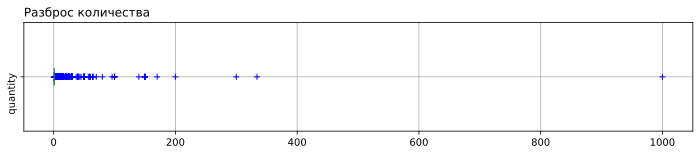

In [10]:
flierprops = dict(marker = '+', markeredgecolor = 'b')
medianprops = dict(linestyle = '-', linewidth = 1)

ecommerce.boxplot(column = 'quantity', medianprops = medianprops, flierprops = flierprops,
                     vert = False, figsize = (12, 2), rot = 90)
plt.title('Разброс количества', loc = 'left')

plt.show()

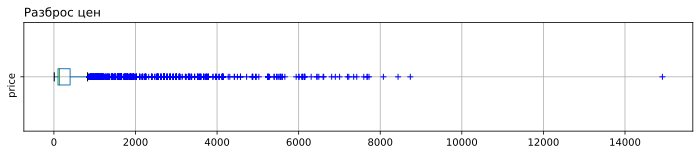

In [11]:
ecommerce.boxplot(column = 'price', medianprops = medianprops, flierprops = flierprops,
                     vert = False, figsize = (12, 2), rot = 90)
plt.title('Разброс цен', loc = 'left')

plt.show()

Посмотрим на эти странные значения.

In [12]:
ecommerce.query('quantity > 198 or price > 8000')

,date,customer_id,order_id,product,quantity,price
1158,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
1981,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,"Сумка-тележка хозяйственная Andersen Alu Star Shopper, Hava, синяя 115-103-90",1,8437.0
2697,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,"Сумка-тележка хозяйственная Andersen Royal Shopper, Hera, синяя 166-004-90",1,8737.0
2997,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo LOGIC DOS+2 красная,1,8077.0
3961,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
5071,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675.0
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,1,14917.0


200-300 небольших недорогих вещиц вполне могут быть заказом какой-нибудь организации, а вот 1000 вантузов вызывают подозрения. Скорее всего это опечатка и их должно быть 100. Или 10, если человек привык вписывать нули, например, в ценах с копейками?  
А вот "аномальные" цены вовсе не аномальные. Эти товары действительно существуют в таком ценовом диапазоне.  

Удаляем вантузы, остальное - без изменений.

In [13]:
ecommerce = ecommerce.loc[ecommerce['quantity'] != 1000]

In [14]:
product_group = ecommerce.groupby('product')['price'].agg('unique').reset_index()
product_group.loc[product_group['price'].apply(lambda x: len(x)) > 1]

,product,price
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,"[2324.0, 1874.0]"
7,"Ёрш унитазный с деревянной ручкой , Ваир 1712012","[56.0, 59.0, 51.0]"
18,Аквилегия обыкновенная Барлоу микс объем 1 л,"[89.0, 105.0]"
23,Алоэ Вера d-12 см h-25 см,"[134.0, 239.0]"
30,Антуриум Тропик Найт НИДЕРЛАНДЫ 1 штука в упаковке,"[224.0, 262.0]"
...,...,...
2191,Штора для ванной комнаты 240х200 Verga белая текстильная 240х200 см 6040,"[1162.0, 750.0]"
2193,Штора для ванной комнаты Bacchetta Dama текстильная 180х200 см 3655,"[600.0, 937.0]"
2238,"Щетка-сметка 3-х рядная деревянная 450 мм (плоская ручка), Поиск Риф 1801095","[49.0, 52.0]"
2240,"Щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096","[70.0, 64.0]"


На одни и те же товары выставлены разные цены. Возможно, у кого-то есть скидочные карты или ещё какие-то привелегии.

In [15]:
print ('Количество дубликатов:',
       ecommerce.loc[ecommerce.duplicated(subset = ['date', 'customer_id', 'order_id', 'product']) == True].shape[0])

Количество дубликатов: 0


# **Исследовательский анализ данных**

In [16]:
ecommerce['date'].describe().reset_index()

,index,date
0,count,6736
1,unique,2605
2,top,2019-04-27 16:00:00
3,freq,51
4,first,2018-10-01 00:00:00
5,last,2019-10-31 16:00:00


Представлены данные с 2018-10-01 00:00:00 по 2019-10-31 16:00:00

In [17]:
# дата и время
ecommerce['datestamp'] = ecommerce['date'].apply(lambda x: x.date())
ecommerce['hour'] = ecommerce['date'].apply(lambda x: x.hour)

Проверим, что предположение о формате даты было верным:

In [18]:
sorted(ecommerce['hour'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [19]:
ecommerce['datestamp'] = pd.to_datetime(ecommerce['datestamp'].astype(str), format = '%Y-%m-%d')
ecommerce['datestamp'].describe().reset_index()

,index,datestamp
0,count,6736
1,unique,394
2,top,2019-05-13 00:00:00
3,freq,146
4,first,2018-10-01 00:00:00
5,last,2019-10-31 00:00:00


Часы - целые числа от 0 до 23, даты - от 01/10/2018 до 31/10/2019.  
Ничего необычного - предположение было верным.

In [20]:
# сумма за позицию товара в заказе
ecommerce['total'] = ecommerce['quantity'] * ecommerce['price']

In [21]:
# сумма заказа
group_order = pd.DataFrame(ecommerce.groupby('order_id')['total'].sum().reset_index())
order_items = dict(zip(group_order.order_id, group_order['total']))
ecommerce['total_order'] = ecommerce['order_id'].map(order_items)

In [22]:
# количество позиций в заказе
group_order = pd.DataFrame(ecommerce.groupby('order_id')['product'].count().reset_index())
order_items = dict(zip(group_order.order_id, group_order['product']))
ecommerce['num_items'] = ecommerce['order_id'].map(order_items)

In [23]:
# количество единиц товара в заказе
group_order = pd.DataFrame(ecommerce.groupby('order_id')['quantity'].sum().reset_index())
order_items = dict(zip(group_order.order_id, group_order['quantity']))
ecommerce['num_prod'] = ecommerce['order_id'].map(order_items)

In [24]:
# количество заказов покупателя
group_user = pd.DataFrame(ecommerce.groupby('customer_id')['order_id'].nunique().reset_index())
user_orders = dict(zip(group_user.customer_id, group_user['order_id']))
ecommerce['user_orders'] = ecommerce['customer_id'].map(user_orders)

In [25]:
# общее количество товаров, заинтересовавших покупателя
group_user = pd.DataFrame(ecommerce.groupby('customer_id')['product'].nunique().reset_index())
user_orders = dict(zip(group_user.customer_id, group_user['product']))
ecommerce['user_products'] = ecommerce['customer_id'].map(user_orders)

In [26]:
# общее количество купленного покупателем товара
group_user = pd.DataFrame(ecommerce.groupby('customer_id')['quantity'].sum().reset_index())
user_orders = dict(zip(group_user.customer_id, group_user['quantity']))
ecommerce['user_items'] = ecommerce['customer_id'].map(user_orders)

In [27]:
print ('Количество уникальных названий товаров:', len(ecommerce['product'].unique()))

Количество уникальных названий товаров: 2342


In [28]:
def lemmater(text, list_word):
    lemmas = m.lemmatize(text)
    for word in lemmas:
        list_word.append(word)
    lemmas = ''.join(lemmas)
    return lemmas[:-1]

In [29]:
products = ecommerce['product'].unique()
list_word = []

lemmas_products = [''] * len(products)
for i in range(len(products)):
    lemmas_products[i] = lemmater(products[i], list_word)

In [30]:
print ('Количество уникальных названий товаров:', len(set(lemmas_products)))

Количество уникальных названий товаров: 2339


Не сильно что-то поменялось.

Уникальных названий товаров не так много, поэтому разделим их на достаточно крупные категории:
- хозтовары
- комнатные растения
- кухня
- ванная комната
- спальня
- уборка
- бытовая химия
- гардеробная
- сервировка стола
- предметы интерьера
- мастерская

In [31]:
# создадим копию списка товаров, чтобы отслеживать, какие названия у нас ещё не обрабатывались
tmp_product_list = list(products[:])
tmp_lemmas_products = lemmas_products[:]

In [32]:
d = dict.fromkeys(tmp_product_list)
for i in range(len(tmp_lemmas_products)):
    d[tmp_product_list[i]] = tmp_lemmas_products[i]
ecommerce['lemmas_product'] = ecommerce['product'].map(d)

In [33]:
d = dict.fromkeys(tmp_lemmas_products)
home_master = ['лестница', 'стремянка', 'крючок', 'стяжка', 'пружина', 'свер', 'приварн',
               'гои', 'сварка', 'линейка', 'скоба', 'инструмент', 'петля', 'фал', 'циркуль',
               'напильник', 'фиксатор', 'шпагат', 'шнур', 'угол', 'решетка', 'завертка', 'пробка']
interior = ['муляж', 'коврик', 'искусственный', 'цветок', 'ковер', 'светильник', 'полка',
            'почтовый', 'обув', 'фото', 'ключница', 'пуф', 'ваза']
wardrobe = ['вешалка', 'короб', 'одежда', 'плечики', 'платье', 'чехол', 'кофр', 'комод', 'ролик', 'лоток']
domestic = ['крем ', 'пена', 'средство', 'антижир', 'посудомоечный']
bedroom = ['плед', 'простыня', 'подушка', 'наматрасник', 'односпальный', 'покрывало', 'одеяло',
           'наволочка', 'пододеяльник']
bathroom = ['корзина', 'ерш', 'штора', 'туалет', 'ванн', 'стир', 'карниз', 'туалет', 'мыло',
            'полотенце', 'вантуз', 'халат', 'утюг', 'бак', 'фен', 'подголовник']
household = ['сушилка', 'гладильн', 'хранение', 'тележка', 'сумка', 'подрукавник', 'прищепок', 'глажение', 'весы']
serving = ['нож', 'тарелка', 'вилка', 'ложка', 'скатерть', 'фужер', 'салфетка', 'кувшин', 'блюдо',
           'кружка', 'блюдце', 'термо', 'стакан', 'бокал', 'столовый']
clean = ['щетка', 'перчатка', 'веник', 'швабра', 'мусор', 'ведро', 'пыль', 'совок',
         'корыто', 'губка', 'микрофибры', 'моп', 'скребок', 'окно']
kitchen = ['толкушка', 'сковорода', 'банка', 'ножеточка', 'чай', 'бутылка', 'салатник',
           'масленка', 'свч', 'противень', 'выпечка', 'продукт', 'орехоколка', 'миска',
           'миксер', 'скалка', 'кастрюля', 'хлебница', 'котел', 'венчик', 'сито', 'штопор',
           'бульонница', 'рыб', 'терка', 'глазунья', 'лопатка', 'кухня', 'зажигалка', 'мантоварка',
           'ковш', 'кондитер', 'картофеле', 'рассекатель', 'кекс', 'дуршлаг', 'контейнер', 'торт',
           'сотейник', 'бидон', 'половник', 'кипятильник', 'яйцо', 'соко']
garden = ['растение', 'рассада', 'пеларгония', 'томат', 'кустовой', 'укроп', 'базилик', 'земляника',
          'годеция', 'огурец', 'бархатцы', 'настурция', 'георгин', 'петуния', 'морковь', 'косметь',
          'цинния', 'дыня', 'роза', 'тюльпан', 'черенок', 'калла', 'незабудка', 'горох', 'урна',
          'гвоздик', 'календула', 'капуста', 'кореопсис', 'лапчатка', 'флокс', 'эшшольций', 'ель',
          'цикламен', 'смолевка', 'вербейник', 'виноград', 'клубника', 'арбуз', 'маттиола', 'бегония',
          'осина', 'салат', 'петрушка', 'лаватер']
i = 0
while i != len(tmp_lemmas_products):
    if (' d' in tmp_lemmas_products[i] and ' h' in tmp_lemmas_products[i]) or\
    (' D' in tmp_lemmas_products[i] and ' H' in tmp_lemmas_products[i] and\
    'ванный' not in tmp_lemmas_products[i]) or\
    (' D' in tmp_lemmas_products[i] and 'см' in tmp_lemmas_products[i]) or\
    ('комнатный' in tmp_lemmas_products[i] and 'растение' in tmp_lemmas_products[i]) or\
    'кашпо' in tmp_lemmas_products[i] or\
    (' d-' in tmp_lemmas_products[i] and 'муляж' not in tmp_lemmas_products[i] and\
    'посуда' not in tmp_lemmas_products[i]) or\
    'горшок' in tmp_lemmas_products[i]:
        d[tmp_lemmas_products[i]] = 'комнатные растения'
        del tmp_lemmas_products[i]
        i -= 1
        #del tmp_product_list[i]
    elif ('диам.' in tmp_lemmas_products[i] and 'кухня' not in tmp_lemmas_products[i]) or\
    ('кассета' in tmp_lemmas_products[i] and 'кухня' not in tmp_lemmas_products[i]) or\
    ('объем' in tmp_lemmas_products[i] and 'ведро' not in tmp_lemmas_products[i] and\
    'таз' not in tmp_lemmas_products[i]) or\
    ('шт' in tmp_lemmas_products[i] and 'упаковка' in tmp_lemmas_products[i]) or\
    [word for word in garden if word in tmp_lemmas_products[i]]:
        d[tmp_lemmas_products[i]] = 'сад'
        del tmp_lemmas_products[i]
        i -= 1
    elif ('кухня' in tmp_lemmas_products[i] and 'интерьерный' not in tmp_lemmas_products[i]) or\
    ('кухонный' in tmp_lemmas_products[i] and 'коврик' not in tmp_lemmas_products[i]) or\
    ('посуда' in tmp_lemmas_products[i] and\
    'щетка' not in tmp_lemmas_products[i] and 'средство' not in tmp_lemmas_products[i]) or\
    ('нож' in tmp_lemmas_products[i] and ('чистка' in tmp_lemmas_products[i] or\
                                         'резка' in tmp_lemmas_products[i] or\
                                         'мясорубка' in tmp_lemmas_products[i])) or\
    ('овощ' in tmp_lemmas_products[i] and 'перчатка' not in tmp_lemmas_products[i]) or\
    ('разделочный' in tmp_lemmas_products[i] and 'доска' in tmp_lemmas_products[i]) or\
    ('весы' in tmp_lemmas_products[i] and 'стол' in tmp_lemmas_products[i]) or\
    ('пресс' in tmp_lemmas_products[i] and 'чеснок' in tmp_lemmas_products[i]) or\
    [word for word in kitchen if word in tmp_lemmas_products[i]]:
        d[tmp_lemmas_products[i]] = 'кухня'
        del tmp_lemmas_products[i]
        i -= 1
    elif ('таз' in tmp_lemmas_products[i] and 'ерш' not in tmp_lemmas_products[i]) or\
    ('ерш' in tmp_lemmas_products[i] and 'унитазный' not in tmp_lemmas_products[i] and\
     'туалет' not in tmp_lemmas_products[i] and 'унитаз' not in tmp_lemmas_products[i]) or\
    [word for word in clean if word in tmp_lemmas_products[i]]:
        d[tmp_lemmas_products[i]] = 'уборка'
        del tmp_lemmas_products[i]
        i -= 1
    elif [word for word in serving if word in tmp_lemmas_products[i]]:
        d[tmp_lemmas_products[i]] = 'сервировка стола'
        del tmp_lemmas_products[i]
        i -= 1
    elif ('чехол' in tmp_lemmas_products[i] and 'доска' in tmp_lemmas_products[i]) or\
    ('чехол' in tmp_lemmas_products[i] and 'подкладка' in tmp_lemmas_products[i]) or\
    [word for word in household if word in tmp_lemmas_products[i]]:
        d[tmp_lemmas_products[i]] = 'хозтовары'
        del tmp_lemmas_products[i]
        i -= 1
    elif ('зубной' in tmp_lemmas_products[i] and 'паста' in tmp_lemmas_products[i]) or\
    [word for word in bathroom if word in tmp_lemmas_products[i]]:
        d[tmp_lemmas_products[i]] = 'ванная и туалет'
        del tmp_lemmas_products[i]
        i -= 1
    elif [word for word in bedroom if word in tmp_lemmas_products[i]]:
        d[tmp_lemmas_products[i]] = 'спальня'
        del tmp_lemmas_products[i]
        i -= 1
    elif ('увлажнять' in tmp_lemmas_products[i] and 'маска' in tmp_lemmas_products[i]) or\
    [word for word in domestic if word in tmp_lemmas_products[i]]:
        d[tmp_lemmas_products[i]] = 'бытовая химия'
        del tmp_lemmas_products[i]
        i -= 1
    elif [word for word in wardrobe if word in tmp_lemmas_products[i]]:
        d[tmp_lemmas_products[i]] = 'гардеробная'
        del tmp_lemmas_products[i]
        i -= 1
    elif [word for word in interior if word in tmp_lemmas_products[i]]:
        d[tmp_lemmas_products[i]] = 'интерьер'
        del tmp_lemmas_products[i]
        i -= 1
    elif [word for word in home_master if word in tmp_lemmas_products[i]]:
        d[tmp_lemmas_products[i]] = 'мастерская'
        del tmp_lemmas_products[i]
        i -= 1
    i += 1

In [34]:
ecommerce['category'] = ecommerce['lemmas_product'].map(d)
del ecommerce['lemmas_product']

In [35]:
ecommerce.sample(3)

,date,customer_id,order_id,product,quantity,price,datestamp,hour,total,total_order,num_items,num_prod,user_orders,user_products,user_items,category
4026,2019-05-25 02:00:00,51f04abe-a71a-4694-87b7-ad9ef4930e51,71480,Мята перечная Шоколадная Chocolate d-7 см h-10 см укорененный черенок,1,74.0,2019-05-25,2,74.0,222.0,3,3,1,1,1,комнатные растения
233,2018-10-12 15:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68623,"Петля приварная гаражная d 14х90 мм с шаром, 1103003",50,38.0,2018-10-12,15,1900.0,1900.0,1,50,35,44,409,мастерская
510,2018-10-28 19:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,Рассада зелени для кухни Розмарина в кассете по 6 шт,1,207.0,2018-10-28,19,207.0,4788.0,21,21,1,3,21,сад


In [36]:
count_products_by_category = (
    ecommerce.groupby(['customer_id', 'category'])['product'].count()
    .reset_index().sort_values('product', ascending = False)
)

In [37]:
count_products_by_category['cumcount'] = count_products_by_category.sort_values(['customer_id', 'product'], ascending = False).groupby('customer_id').cumcount()

Для клиентов, покупавших что-либо только один раз, невозможно определить их категорию.

In [38]:
def def_category_user(category, products, cumcount):
    if products <= 1 and cumcount == 0:
        return 'не постоянный клиент'
    if cumcount == 0:
        return category

In [39]:
count_products_by_category['category_user'] = count_products_by_category.apply(lambda x: def_category_user(x['category'], x['product'], x['cumcount']), axis = 1)

In [40]:
count_products_by_category = count_products_by_category.sort_values('cumcount')
count_products_by_category = count_products_by_category.drop_duplicates('customer_id', keep = 'first')
del count_products_by_category['category']
del count_products_by_category['product']
del count_products_by_category['cumcount']

In [41]:
ecommerce = pd.merge(ecommerce, count_products_by_category, on = 'customer_id', how = 'outer')

In [42]:
def def_optional_category(category, category_user):
    if category == category_user:
        return 'основной'
    else:
        return 'дополнительный'

In [43]:
ecommerce['optional_category'] = ecommerce.apply(lambda x: def_optional_category(x['category'], x['category_user']), axis = 1)

# **Анализ товарного ассортимента**

In [44]:
if not os.path.exists('images'):
    os.makedirs('images')

In [45]:
explodeTuple = (.1, .1, .1, .1, .1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.2, 2.5)
colors  = ('#B300B3', '#E413C3', '#D700BF', '#FDBBED', '#FA86DF', '#FED6F4',
           '#B300B3', '#E413C3', '#D700BF', '#FDBBED', '#FA86DF', '#FED6F4')

In [46]:
def pie_plot(series, column, text):
    series.plot(y = column, kind = 'pie', autopct = '%.2f%%', pctdistance = 0.8, radius = 1.1,
              explode = explodeTuple, colors = colors)

    plt.title(text + ' в каждой категории\n')
    plt.ylabel('')
    plt.savefig('../images/'+str(series.name)+'.png', bbox_inches = 'tight')
    plt.show()

In [47]:
print ('Количество наименований в каждой категории:')
count_product_category = ecommerce.groupby('category')['product'].nunique()\
                         .sort_values(ascending = False)
count_product_category = count_product_category.rename('count_product_category')
count_product_category.reset_index()

Количество наименований в каждой категории:


,category,count_product_category
0,сад,786
1,комнатные растения,435
2,хозтовары,233
3,интерьер,176
4,кухня,164
5,сервировка стола,141
6,ванная и туалет,121
7,уборка,108
8,гардеробная,75
9,мастерская,74


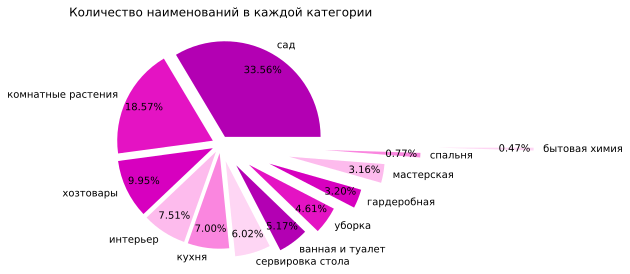

In [48]:
pie_plot(count_product_category, 'product', 'Количество наименований')

In [49]:
print ('Количество покупателей каждой категории:')
count_user_category = ecommerce.groupby('category')['customer_id'].nunique().sort_values(ascending = False)
count_user_category = count_user_category.rename('count_user_category')
count_user_category.reset_index().rename(columns = {'customer_id':'users'})

Количество покупателей каждой категории:


,category,count_user_category
0,сад,729
1,хозтовары,488
2,комнатные растения,473
3,интерьер,248
4,кухня,156
5,ванная и туалет,154
6,сервировка стола,145
7,уборка,125
8,гардеробная,79
9,мастерская,78


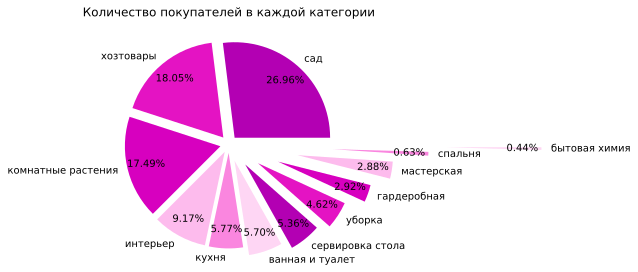

In [50]:
pie_plot(count_user_category, 'customer_id', 'Количество покупателей')

In [51]:
print ('Объём продаж каждой категории:')
count_items_category = ecommerce.groupby('category')['quantity'].sum().sort_values(ascending = False)
count_items_category = count_items_category.rename('count_items_category')
count_items_category.reset_index().rename(columns = {'quantity':'products'})

Объём продаж каждой категории:


,category,count_items_category
0,сад,5147
1,интерьер,2530
2,мастерская,1681
3,комнатные растения,1491
4,гардеробная,1117
5,сервировка стола,1023
6,уборка,940
7,хозтовары,870
8,кухня,544
9,ванная и туалет,450


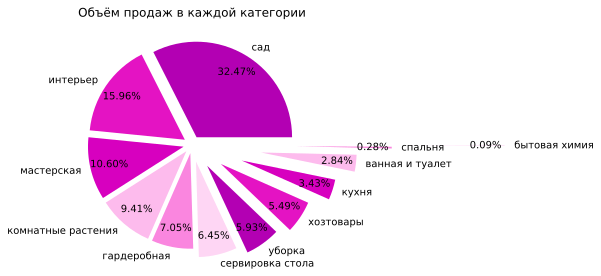

In [52]:
pie_plot(count_items_category, 'quantity', 'Объём продаж')

In [53]:
print ('Средняя стоимость товаров каждой категории:')
mean_price_category = ecommerce.groupby('category')['price'].mean().sort_values(ascending = False)
mean_price_category = mean_price_category.rename('mean_price_category')
mean_price_category.reset_index().rename(columns = {'price':'mean_price'})

Средняя стоимость товаров каждой категории:


,category,mean_price_category
0,спальня,1710.227273
1,хозтовары,1662.295676
2,мастерская,1343.377049
3,ванная и туалет,762.252381
4,кухня,514.990783
5,уборка,504.551570
6,сервировка стола,438.113990
7,интерьер,421.317259
8,гардеробная,419.118182
9,комнатные растения,248.993909


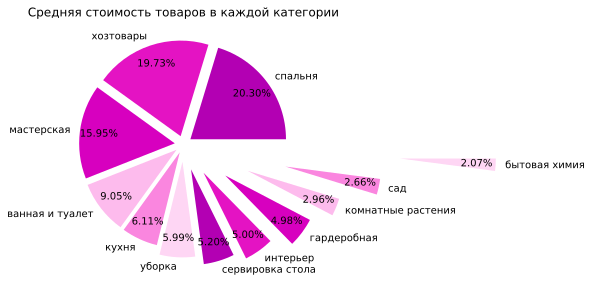

In [54]:
pie_plot(mean_price_category, 'price', 'Средняя стоимость товаров')

In [55]:
describe_price = ecommerce.groupby('category')['price'].describe().reset_index().sort_values('mean', ascending = False)
describe_price

,category,count,mean,std,min,25%,50%,75%,max
9,спальня,22.0,1710.227273,1688.004399,202.0,712.00,918.0,2697.50,6134.0
11,хозтовары,717.0,1662.295676,1581.255155,37.0,727.00,1087.0,1949.00,14917.0
6,мастерская,122.0,1343.377049,1459.497017,15.0,44.00,993.0,1949.00,5549.0
1,ванная и туалет,210.0,762.252381,872.147730,21.0,149.25,520.5,1115.25,5474.0
5,кухня,217.0,514.990783,619.680219,11.0,119.00,247.0,787.00,5512.0
10,уборка,223.0,504.551570,714.738657,14.0,104.00,262.0,524.00,5399.0
8,сервировка стола,193.0,438.113990,563.842701,21.0,97.00,206.0,457.00,2399.0
3,интерьер,394.0,421.317259,716.700802,9.0,37.00,65.0,375.50,4312.0
2,гардеробная,110.0,419.118182,828.984653,9.0,82.25,164.0,395.75,7724.0
4,комнатные растения,985.0,248.993909,409.742805,14.0,74.00,139.0,195.00,3749.0


In [56]:
cols = ecommerce.groupby('category')['price'].mean().reset_index()['category'].unique()

color_mean = '#E413C3'
color_median = '#FA86DF'
color_boxes = '#770087'

flierprops = dict(marker = '+', markeredgecolor = '#FA86DF')
meanpointprops = dict(marker = '.', markeredgecolor = color_mean, markerfacecolor = color_mean)
medianprops = dict(linestyle = '-', linewidth = 1)
boxprops = dict(linestyle = '-', linewidth = 1,)

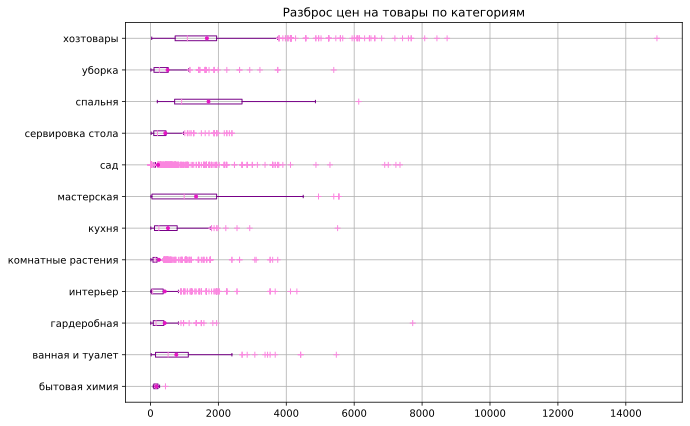

In [57]:
fig, ax = plt.subplots(figsize = (10, 7), sharey = True)

i = 0
for x in cols:
    bp = ecommerce.query('category == @x').boxplot(column = 'price', medianprops = medianprops,
                            meanprops = meanpointprops, showmeans = True, return_type = 'dict',
                            flierprops = flierprops, vert = False, boxprops = boxprops,
                            positions = [i], ax = ax)
    [item.set_color(color_median) for item in bp['medians']]
    [item.set_color(color_boxes) for item in bp['boxes']]
    [item.set_color(color_boxes) for item in bp['whiskers']]
    [item.set_color(color_boxes) for item in bp['caps']]
    i += 1

plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], cols)
plt.title('Разброс цен на товары по категориям')
plt.xlabel('')

plt.show()

In [58]:
print ('Суммарная выручка по каждой категории:')
total_sum_category = ecommerce.groupby('category')['total'].sum().sort_values(ascending = False)
total_sum_category = total_sum_category.rename('total_sum_category')
total_sum_category.reset_index()

Суммарная выручка по каждой категории:


,category,total_sum_category
0,хозтовары,1270810.0
1,сад,1014299.0
2,комнатные растения,345747.0
3,интерьер,313041.0
4,сервировка стола,217324.0
5,мастерская,213481.0
6,ванная и туалет,197234.0
7,кухня,189316.0
8,уборка,184764.0
9,гардеробная,160644.0


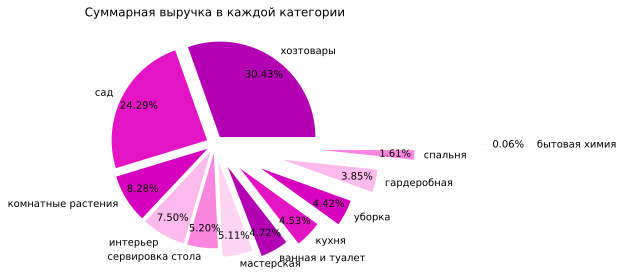

In [59]:
pie_plot(total_sum_category, 'total', 'Суммарная выручка')

In [60]:
ecommerce['month'] = ecommerce['datestamp'].astype('datetime64[M]')
users_per_month = ecommerce.groupby(['month', 'category']).agg({'customer_id':'count'}).reset_index()

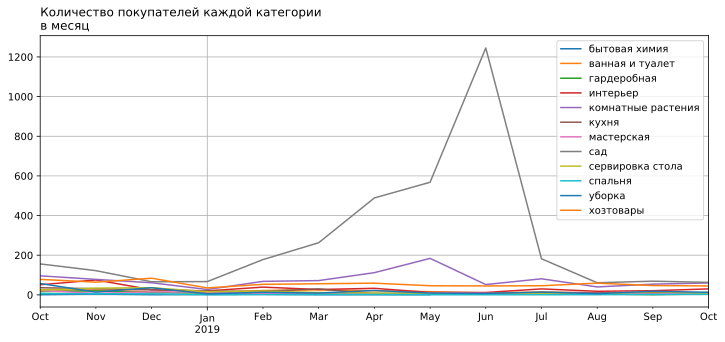

In [61]:
fig, ax = plt.subplots(figsize = (12, 5), sharey = True)

users_per_month.groupby('category').plot('month', 'customer_id', grid = True, ax = ax)
plt.legend(('бытовая химия', 'ванная и туалет', 'гардеробная', 'интерьер', 'комнатные растения', 'кухня',
            'мастерская', 'сад', 'сервировка стола', 'спальня', 'уборка', 'хозтовары'))
plt.title('Количество покупателей каждой категории\nв месяц', loc = 'left')
plt.xlabel('')

plt.show()

В мае-июне возрастает популярность категории "сад", по всей видимости перед дачным сезоном, а востребованность товаров из остальных категорий не зависит от времени года.

In [62]:
def category_shape_plot(data, png_name, del_width, format_num, text):
    f, ax = plt.subplots(figsize = (8, 5))
    sns.set_style('whitegrid')
    
    ax1 = sns.barplot(x = 'perc', y = 'category', data = data, palette = ['#B300B3', '#F557D3'],
                    hue = 'optional_category')
    
    # добавляем подписи процентов на график
    rects = ax1.patches
    texts = np.append(data.query('optional_category == "основной"')['perc'].values,
                      data.query('optional_category == "дополнительный"')['perc'].values)
    maxw = 0
    for rect, label in zip(rects, texts):
        width = rect.get_width()
        if np.isnan(width):
            continue
        ax1.text(width + del_width, rect.get_y() + 0.3, str(round(label, 2))+format_num,
                 color = 'k', ha = "center", fontsize = 8)
        if maxw < width:
            maxw = width
    # устанавливаем ширину области графика, чтобы подписи процентов влезали
    ax.set_xlim(0, maxw + del_width * 2.5)
    
    # настраиваем отображение легенды, названия и подписей осей
    l = ax.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
    l.set_title('ассортимент')
    ax.set_title('Соотношение основного и дополнительного ассортимента '+text, loc = 'left')
    ax.set_xlabel('')
    ax.set_ylabel('')

    plt.savefig('../images/'+png_name+'.png', bbox_inches = 'tight')
    plt.show()

In [63]:
category_shape = (
    ecommerce.groupby(['category', 'optional_category'])['product'].count().reset_index()
    .rename(columns = {'product':'count'})
)

category_shape = pd.merge(category_shape, category_shape.groupby(['category'])['count'].sum()
                    .reset_index().rename(columns = {'count':'total'}),
                    how = 'outer', on = 'category')

category_shape['perc'] = round(category_shape['count'] / category_shape['total'] * 100, 2)
category_shape = category_shape.sort_values(['total', 'category', 'optional_category'], ascending = False)

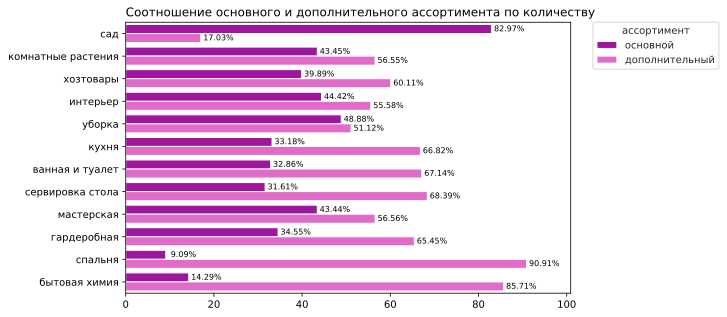

In [64]:
category_shape_plot(category_shape, 'category_shape', 4, '%', 'по количеству')

# **Гипотезы**

$H_0$ = "средняя стоимость товаров разных категорий различается"

In [65]:
pvalue = pd.DataFrame()
def pval_cat(cat1, cat2, one, two, i):
    
    alpha = 0.05

    results = st.ttest_ind(one, two)

    print('p-значение:', results.pvalue)
    print('вероятность: {:.2%}'.format(results.pvalue))
    pvalue.loc[cat1, cat2] = results.pvalue
    pvalue.loc[cat2, cat1] = results.pvalue
    
    if (results.pvalue < alpha):
        print("Средняя стоимость товаров в категориях '{}' и '{}' НЕ РАЗЛИЧАЕТСЯ".format(cat1, cat2))
    else:
        print("Средняя стоимость товаров в категориях '{}' и '{}' возможно различается".format(cat1, cat2))

In [66]:
category = ecommerce['category'].unique()

i = 0
for cat1 in category:
    for cat2 in category:
        if cat1 == cat2:
            break
        print (i + 1, end = '. ')
        pval_cat(cat2, cat1, ecommerce.query('category == @cat1')['price'],
                   ecommerce.query('category == @cat2')['price'], i)
        i += 1
        print ()

1. p-значение: 0.1147596302125913
вероятность: 11.48%
Средняя стоимость товаров в категориях 'комнатные растения' и 'сад' возможно различается

2. p-значение: 1.3073391940700515e-12
вероятность: 0.00%
Средняя стоимость товаров в категориях 'комнатные растения' и 'уборка' НЕ РАЗЛИЧАЕТСЯ

3. p-значение: 8.750344005902358e-18
вероятность: 0.00%
Средняя стоимость товаров в категориях 'сад' и 'уборка' НЕ РАЗЛИЧАЕТСЯ

4. p-значение: 1.2699527136622583e-132
вероятность: 0.00%
Средняя стоимость товаров в категориях 'комнатные растения' и 'хозтовары' НЕ РАЗЛИЧАЕТСЯ

5. p-значение: 0.0
вероятность: 0.00%
Средняя стоимость товаров в категориях 'сад' и 'хозтовары' НЕ РАЗЛИЧАЕТСЯ

6. p-значение: 7.192429321366003e-25
вероятность: 0.00%
Средняя стоимость товаров в категориях 'уборка' и 'хозтовары' НЕ РАЗЛИЧАЕТСЯ

7. p-значение: 5.273781659095957e-08
вероятность: 0.00%
Средняя стоимость товаров в категориях 'комнатные растения' и 'сервировка стола' НЕ РАЗЛИЧАЕТСЯ

8. p-значение: 2.6978363883223827e-1

65. p-значение: 0.0018217121858988433
вероятность: 0.18%
Средняя стоимость товаров в категориях 'бытовая химия' и 'спальня' НЕ РАЗЛИЧАЕТСЯ

66. p-значение: 2.6712123553966063e-07
вероятность: 0.00%
Средняя стоимость товаров в категориях 'гардеробная' и 'спальня' НЕ РАЗЛИЧАЕТСЯ



In [67]:
def color_negative_red(val):
    color = '#FED6F4' if val >= .05 else ''
    return 'background-color: %s' % color

In [68]:
print ('Раскрашенные ячейки - возможно различающиеся по средней цене товара категории')
pvalue.fillna(-1).style.applymap(color_negative_red)

Раскрашенные ячейки - возможно различающиеся по средней цене товара категории


,сад,комнатные растения,уборка,хозтовары,сервировка стола,мастерская,интерьер,кухня,ванная и туалет,бытовая химия,гардеробная,спальня
комнатные растения,0.11476,-1,1.30734e-12,1.26995e-132,5.27378e-08,2.38861e-66,2.5971e-08,1.33544e-14,5.26353e-36,0.496881,0.000319347,1.72524e-42
сад,-1,0.11476,8.75034e-18,0,2.69784e-10,6.90186e-114,2.08601e-14,3.56507e-19,1.746e-53,0.682547,1.61141e-05,2.13957e-48
уборка,8.75034e-18,1.30734e-12,-1,7.19243e-25,0.298469,4.9175e-12,0.165871,0.870193,0.000815927,0.0861322,0.331695,8.40535e-10
хозтовары,0,1.26995e-132,7.19243e-25,-1,1.02222e-24,0.0376657,3.57638e-45,3.15976e-24,7.77946e-15,0.000461745,2.39676e-15,0.888882
сервировка стола,2.69784e-10,5.27378e-08,0.298469,1.02222e-24,-1,1.25044e-13,0.775613,0.191635,1.46151e-05,0.0827386,0.81313,1.65686e-12
мастерская,6.90186e-114,2.38861e-66,4.9175e-12,0.0376657,1.25044e-13,-1,1.63366e-19,2.35939e-12,7.79548e-06,0.00336139,1.72138e-08,0.291377
интерьер,2.08601e-14,2.5971e-08,0.165871,3.57638e-45,0.775613,1.63366e-19,-1,0.10568,3.4613e-07,0.198964,0.978101,7.66071e-13
кухня,3.56507e-19,1.33544e-14,0.870193,3.15976e-24,0.191635,2.35939e-12,0.10568,-1,0.000776119,0.0414933,0.240718,5.22126e-11
ванная и туалет,1.746e-53,5.26353e-36,0.000815927,7.77946e-15,1.46151e-05,7.79548e-06,3.4613e-07,0.000776119,-1,0.0126032,0.000761174,2.16076e-05
бытовая химия,0.682547,0.496881,0.0861322,0.000461745,0.0827386,0.00336139,0.198964,0.0414933,0.0126032,-1,0.27384,0.00182171


Между следующими категориями наблюдаются различия в средней цене товаров:
- *комнатные растения* и *сад*
- *уборка* и *сервировка стола*
- *уборка* и *интерьер*
- *сервировка стола* и *интерьер*
- *уборка* и *кухня*
- *сервировка стола* и *кухня*
- *интерьер* и *кухня*
- *комнатные растения* и *бытовая химия*
- *сад* и *бытовая химия*
- *уборка* и *бытовая химия*
- *сервировка стола* и *бытовая химия*
- *интерьер* и *бытовая химия*
- *уборка* и *гардеробная*
- *сервировка стола* и *гардеробная*
- *интерьер* и *гардеробная*
- *кухня* и *гардеробная*
- *бытовая химия* и *гардеробная*
- *хозтовары* и *спальня*
- *мастерская* и *спальня*

Действительно, различия по средним ценам между категориями видны на графике выше.

$H_0$ = "средняя стоимость товаров основного и дополнительного ассортиментов в категориях различается"

In [69]:
pvalue2 = pd.DataFrame()
def pval(cat, one, two, i):
    
    alpha = 0.05

    results = st.ttest_ind(one, two)

    print('p-значение:', results.pvalue)
    print('вероятность: {:.2%}'.format(results.pvalue))
    pvalue2.loc[i, 'category'] = cat
    pvalue2.loc[i, 'pvalue'] = results.pvalue
    if (results.pvalue < alpha):
        print("Категория '{}': НЕ РАЗЛИЧАЕТСЯ".format(cat))
        pvalue2.loc[i, 'diff'] = 'НЕ РАЗЛИЧАЕТСЯ'
    else:
        print("Категория '{}': возможно различается".format(cat))
        pvalue2.loc[i, 'diff'] = 'возможно различается'

In [70]:
category = ecommerce['category'].unique()

i = 0
for cat in category:
    print (i + 1, end = '. ')
    pval(cat, ecommerce.query('category == @cat and optional_category == "основной"')['price'],
               ecommerce.query('category == @cat and optional_category == "дополнительный"')['price'], i)
    i += 1
    print ()

1. p-значение: 0.000978422197299114
вероятность: 0.10%
Категория 'комнатные растения': НЕ РАЗЛИЧАЕТСЯ

2. p-значение: 2.2917264780271555e-121
вероятность: 0.00%
Категория 'сад': НЕ РАЗЛИЧАЕТСЯ

3. p-значение: 0.002695726185589523
вероятность: 0.27%
Категория 'уборка': НЕ РАЗЛИЧАЕТСЯ

4. p-значение: 0.5961928011027282
вероятность: 59.62%
Категория 'хозтовары': возможно различается

5. p-значение: 0.0001984981656561405
вероятность: 0.02%
Категория 'сервировка стола': НЕ РАЗЛИЧАЕТСЯ

6. p-значение: 0.14464302962468467
вероятность: 14.46%
Категория 'мастерская': возможно различается

7. p-значение: 0.0012491918750849606
вероятность: 0.12%
Категория 'интерьер': НЕ РАЗЛИЧАЕТСЯ

8. p-значение: 0.03503112004482311
вероятность: 3.50%
Категория 'кухня': НЕ РАЗЛИЧАЕТСЯ

9. p-значение: 0.5138416702402808
вероятность: 51.38%
Категория 'ванная и туалет': возможно различается

10. p-значение: 0.47209686600295897
вероятность: 47.21%
Категория 'бытовая химия': возможно различается

11. p-значение: 0.38

В среднем цена на товары из категорий
- *хозтовары*
- *мастерская*
- *ванная и туалет*
- *бытовая химия*
- *гардеробная*
- *спальня*

в зависимости от принадлежности к основному или дополнительному ассортименту может различаться.  
Возможно, товары, представленные в остальных категриях имеют меньший разброс цен.

In [71]:
pvalue2

,category,pvalue,diff
0,комнатные растения,9.784222e-04,НЕ РАЗЛИЧАЕТСЯ
1,сад,2.291726e-121,НЕ РАЗЛИЧАЕТСЯ
2,уборка,2.695726e-03,НЕ РАЗЛИЧАЕТСЯ
3,хозтовары,5.961928e-01,возможно различается
4,сервировка стола,1.984982e-04,НЕ РАЗЛИЧАЕТСЯ
5,мастерская,1.446430e-01,возможно различается
6,интерьер,1.249192e-03,НЕ РАЗЛИЧАЕТСЯ
7,кухня,3.503112e-02,НЕ РАЗЛИЧАЕТСЯ
8,ванная и туалет,5.138417e-01,возможно различается
9,бытовая химия,4.720969e-01,возможно различается


In [72]:
category_price = (
    ecommerce.groupby(['category', 'optional_category'])['price'].mean().reset_index()
    .rename(columns = {'price':'perc'})
)

category_price = category_price.sort_values(['category', 'optional_category'], ascending = False)

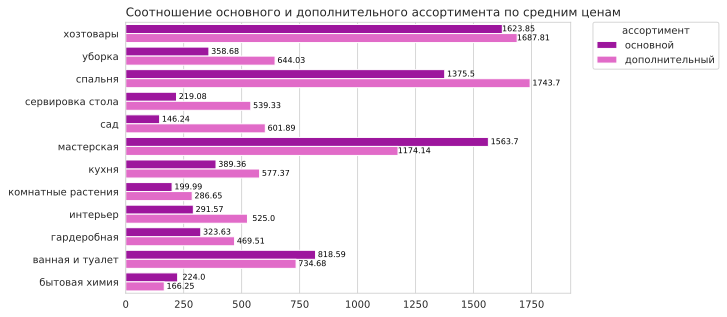

In [73]:
category_shape_plot(category_price, 'category_price', 70, '', 'по средним ценам')

# **Выводы**

**1. Проблемы в данных**  
Даты были записаны в достаточно странном формате: "2018100116"  
Было предположено, что это "ГГГГММДДЧЧ", и даты преобразованы в вид "2018-10-01 16:00"  

Заказ единовременно 1000 вантузов принят как нетипичный и в исследовании не рассматривался.  

**2. Исследование данных**  
Данные представлены в период с 2018-10-01 00:00:00 по 2019-10-31 16:00:00  

Все товары разделены на категории:
- хозтовары
- комнатные растения
- кухня
- ванная комната
- спальня
- уборка
- бытовая химия
- гардеробная
- сервировка стола
- предметы интерьера
- мастерская

**3. Анализ товарного ассортимента**  
Категория 'сад', в которую попали срезанные и кустовые цветы и крупные растения, представлена объёмней всего:
![](../images/count_product_category.png)
И покупателей в неё оказалось больше всего:
![](../images/count_user_category.png)
Возможно, люди чаще заходят купить букет цветов в подарок, чем, например, посуду или вешалки для одежды. Объёмы продаж в этой категории тоже превышают объёмы продаж других категорий:
![](../images/count_items_category.png)
Сердняя цена товара выше в категории 'спальня', которая представлена постельным бельём и пледами:
![](../images/mean_price_category.png)
А наибольший разброс цен в категориях 'хозтовары', 'гардеробная' и 'сад'.
Самой прибыльной оказалась категория 'хозтовары':
![](../images/total_sum_category.png)
Скорее всего было несколько крупных покупок (например, гладильные доски или уличные сушилки для белья) и множество мелких, которые в сумме принесли хорошую выручку.  

В мае-июне возрастает популярность категории "сад", по всей видимости перед дачным сезоном, а востребованность товаров из остальных категорий не зависит от времени года.  

**4. Гипотезы**  
Была выдвинута гипотеза о том, что средняя стоимость товаров разных категорий различается.  
Для проверки этой гипотезы было порведено 66 тестов сравнения попарно всех категорий.  
Цены во многих категориях действительно значительно различаются, но не во всех.  
Между следующими категориями наблюдаются различия в средней цене товаров:
- комнатные растения и сад
- уборка и сервировка стола
- уборка и интерьер
- сервировка стола и интерьер
- уборка и кухня
- сервировка стола и кухня
- интерьер и кухня
- комнатные растения и бытовая химия
- сад и бытовая химия
- уборка и бытовая химия
- сервировка стола и бытовая химия
- интерьер и бытовая химия
- уборка и гардеробная
- сервировка стола и гардеробная
- интерьер и гардеробная
- кухня и гардеробная
- бытовая химия и гардеробная
- хозтовары и спальня
- мастерская и спальня

Это подтверждается графиком соотношения средних цен товаров в разных категориях.  

Также была выдвинута гипотеза о том, что средняя стоимость товаров основного и дополнительного ассортиментов в категориях различается.  
Для проверки этой гипотезы было порведено 12 тестов сравнения для каждой категории.  
В среднем цена на товары из категорий
- хозтовары
- мастерская
- ванная и туалет
- бытовая химия
- гардеробная
- спальня  

в зависимости от принадлежности к основному или дополнительному ассортименту может различаться.  
![](../images/category_price.png)

Презентация: [Анализ товарного ассортимента "Пока все ещё тут".pdf](https://yadi.sk/i/Y59MQQVJwgKIDQ)